In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 비지도학습

### 9.1 군집

고객 분류, 데이터 분석, 차원 축소 기법, 이상치 탐지(부정 거래 탐지), 준지도 학습, 검색 엔진, 이미지 분할 등에 사용 

- k-평균: 센트로이드(중심)라는 특정 샘플을 중심으로 모인 샘플들의 집합

- DBSCAN: 밀집된 샘플들의 연속으로 이루어진 집합

- 가우스 혼합: 특정 가우스 분포를 따르는 샘플들의 집합

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

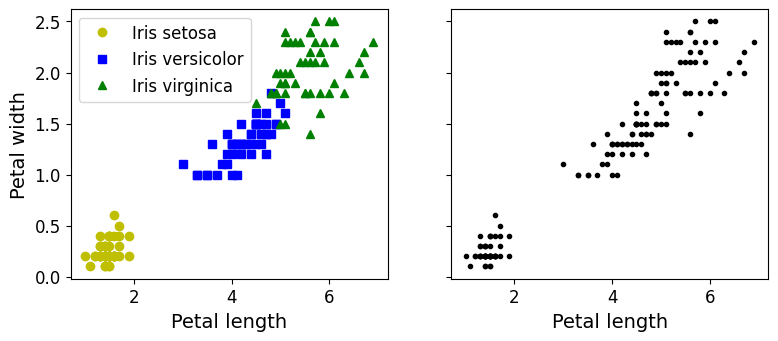

In [4]:
plt.figure(figsize=(9, 3.5))

# 왼편 그림: 실제 품종별 분류
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")  
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

꽃잎 길이와 너비만으로는 두 개의 구집으로만 구분이 가능해 보인다.  
하지만 꽃잎 길이와 너비와 더불어 꽃받침 길이와 너비까지 포함한 네 개의 특성을 모두 사용하여 `GaussianMixture`를 통해 세 개의 군집으로 나눌 수 있다.

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

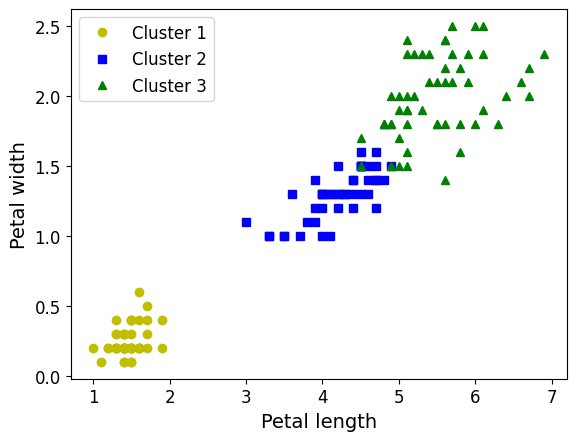

In [8]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

군집화 정확도 확인을 위해 군집 별 품종의 최빈값을 `mapping`을 통해 확인한다.

In [6]:
from scipy import stats

mapping = {}

for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id], keepdims=True )
    mapping[mode[0]] = class_id

mapping

{1: 0, 2: 1, 0: 2}

1번 인덱스 군집 : 세토사(0)가 제일 많음  
2번 인덱스 군집 : 버시컬러(1)가 제일 많음  
0번 인덱스 군집 : 버지니카(2)가 제일 많음

In [9]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

### 9.1.1  k-평균

지정된 5개의 센터를 중심으로 지정된 표준편차를 따르는 원 모양의 2000개의 군집 데이터 샘플

In [10]:
from sklearn.datasets import make_blobs

In [11]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [12]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [13]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

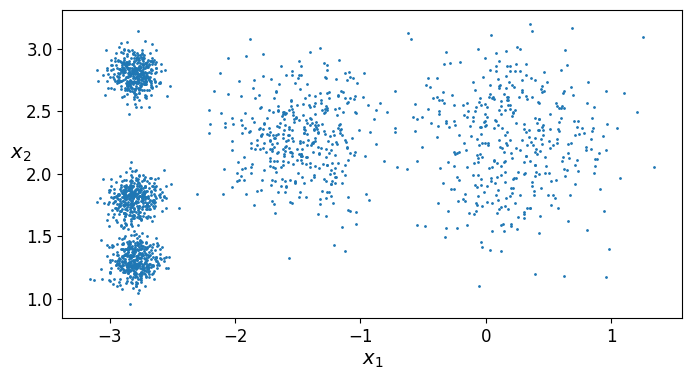

In [14]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

샘플 덩어리 다섯 개로 이루어진 레이블 없는 데이터셋

#### K-means

In [15]:
from sklearn.cluster import KMeans

In [25]:
k = 5
kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
y_pred = kmeans.fit_predict(X)

y_pred 값은 0, 1, 2, 3, 4 등 정수로 구성된다.  
하지만 이는 임의로 지정된 군집의 인덱스를 가리킬 뿐이며 클래스 분류와는 아무 상관 없다.

In [26]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [28]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

위에서 지정된 인덱스는 무작위로 지정된 인덱스임 (실제 군집 인덱스와 다름)

5개의 센트로이드의 좌표  
KMeans 모델이 찾아낸 센트로이드 정보는 cluster_centers_ 속성에 저장된다.

In [29]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

새로운 샘플에 가장 가까운 센트로이드의 클러스터를 할당하여 새로운 데이터에 대한 군집 예측도 가능하다.

In [30]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

클러스터의 `결정 경계`를 그려보면 `보로노이 다이어그램`을 얻을 수 있다  
(센트로이드는 x로 표시)

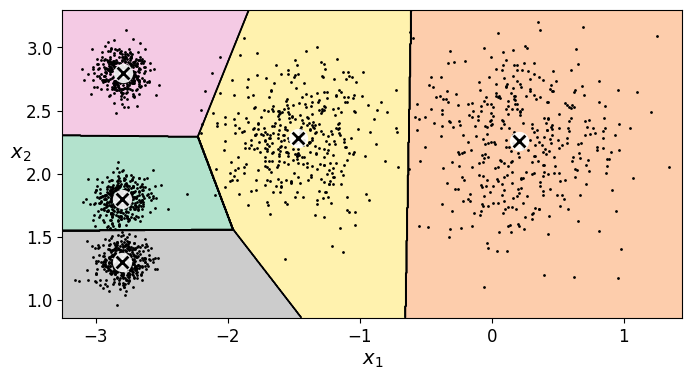

In [32]:
# 산점도 그리기
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

# 센트로이드 그리기
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

# 결정 경계 시각화
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

샘플 몇 개는 레이블이 잘못 부여됨  
실제 `k-means 알고리즘`은 `클러스터의 크기`가 많이 다르면 잘 작동하지 않음  
(샘플을 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문)

**하드 군집**  
각 샘플에 대해 가장 가까운 하나의 클러스터에 할당하는 것  

**소프트 군집**  
클러스터마다 샘플에 점수를 부여하는 것
- 여기서 점수는 샘플과 센트로이드 사이의 거리
- 가우시안 방사기저 함수를 이용한 유사도 점수를 사용할 수도 있고, `KMeans 클래스`의 `transform()` 메서드는 샘플과 각 센트로이드 사이의 유클리드 거리를 반환

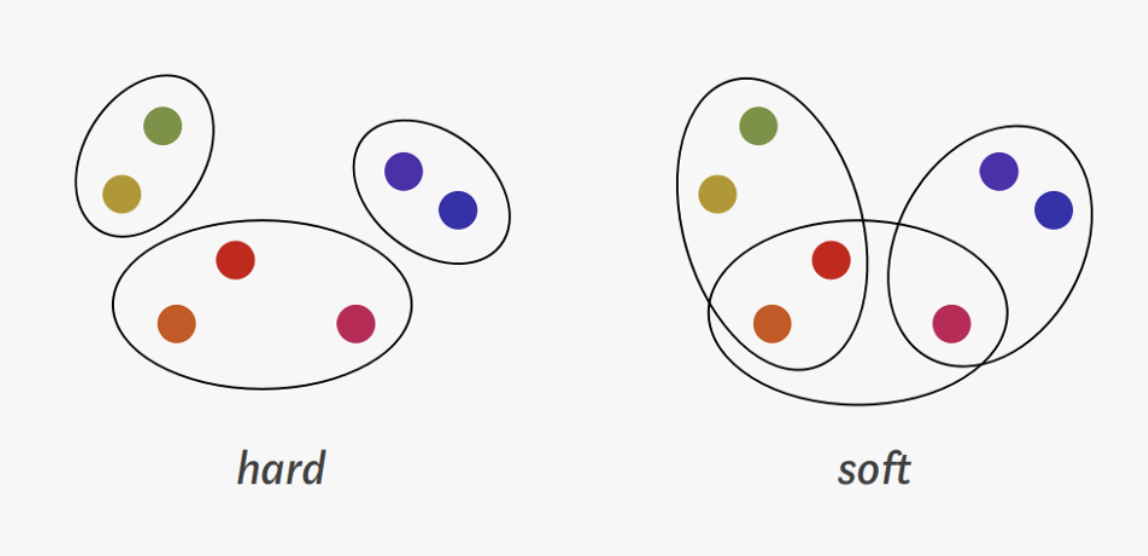

X_new 데이터를 변환  
각 센트로이드로부터의 유클리드 거리를 반환한다.

In [34]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

#### k-means 알고리즘  
(1) 초기화 : 주어진 데이터셋에서 무작위로 k개의 샘플을 뽑아 센트로이드(centroid)로 지정한다.

(2) 거리 계산 : 모든 샘플에 대해 각 센트로이드와의 거리를 계산한다.

(3) 클러스터 할당 : 각 샘플들은 가장 가까운 거리의 센트로이드와 하나의 클러스터로 묶인다.

(4) 센트로이드 업데이트 : 모든 샘플들의 클러스터가 정해지면, 각 클러스터에 속한 샘플들의 평균값을 성분으로 갖는 새로운 센트로이드를 지정한다.

(5) 센트로이드가 더이상 바뀌지 않을 때까지 (2)~(4)를 반복한다.

In [42]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=42)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=2, random_state=42)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=3, random_state=42)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=42)

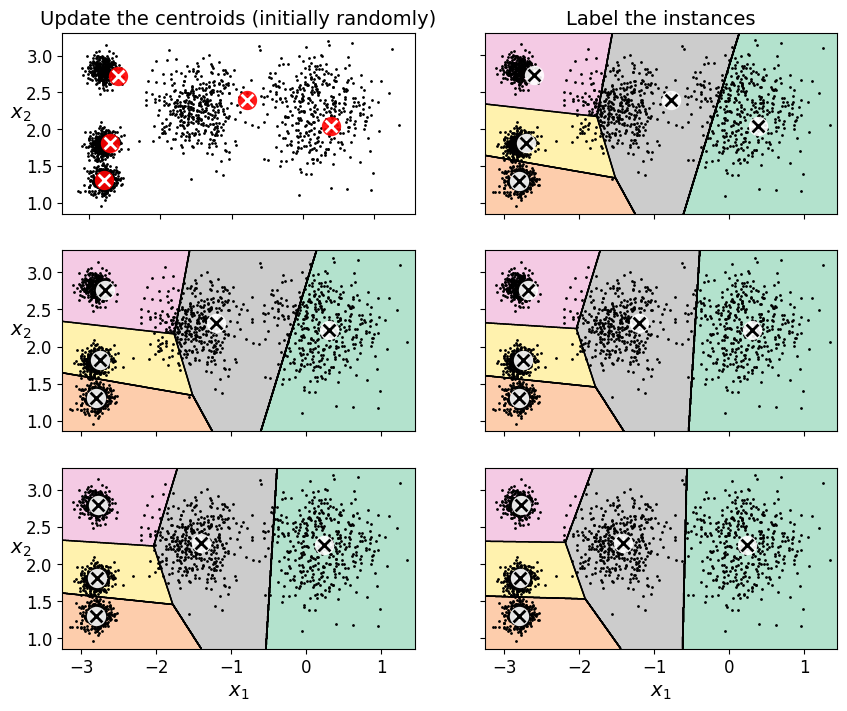

In [43]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

이 알고리즘이 수렴하는 것이 보장은 되지만, 적절한 솔루션으로 수렴하지 못할 수도 있다.  
이 여부는 `센트로이드 초기화`에 달려 있다.

#### 센트로이드 초기화 방법

**이너셔(inertia)**  
`각 샘플과 가장 가까운 센트로이드와의 거리의 제곱의 합`이며, 각 군집이 센트로이드에 얼마나 가까이 모여있는가를 측정한다. 따라서 이너셔가 작을 수록 군집이 잘 구성되었다고 평가한다.

훈련된 KMeans 모델의 경우 `inertia_` 속성에 관성 값이 저장되며, `score()` 메서드가 이너셔의 음숫값을 반환한다. 이유는 점수(score)는 높을 수록 좋은 모델을 나타내도록 해야 하기 때문이다. KMeans 모델은 훈련 과정 중에 다양한 초기화 과정을 실험하고 그 중에 이너셔가 가장 작은 값이 되는 센트로이드를 선택한다.

In [44]:
kmeans.inertia_

211.59853725816836

In [46]:
kmeans.score(X)

-211.59853725816834

이너셔가 각 훈련 샘플과 가장 가까운 센트로이드 사이의 거리의 제곱 합인지 확인

In [45]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816862

**센트로이드 초기화 반복 횟수**

무작위 초기와 문제를 해결하기 위해 k-평균 알고리즘의 초기화를 여러 번 실행한 다음에 가장 낮은 관성을 보이는 모델을 최종 모델로 선택한다.  
랜덤 초기화 횟수는 `n_init`매개변수로 조절한다.  
기본값은 `n_init=10`으로 fit()메서드를 호출할 때 전체 알고리즘이 10번 진행한다.

**k-means++ 초기화 알고리즘**

센트로이드 무작위 초기화 문제의 보다 근본적인 해결책을 제시

기존에 선택된 센트로이드들과의 거리가 먼 샘플일 수록 다음 센트로이드로 선택될 확률이 높아지도록 한다.  

사이킷런의 KMeans 모델의 기본 초기화 알고리즘으로 사용된다.

**k-means 속도 개선**  
불필요한 거리 계산을 많이 피함으로써 알고리즘의 속도를 상당히 높일 수 있다.  
`'algorithm'`매개변수를 바꿔 사용할 수 있다.

In [48]:
%timeit -n 50 KMeans(algorithm="elkan", n_init = 10, random_state=42).fit(X)

121 ms ± 2.63 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [49]:
%timeit -n 50 KMeans(algorithm="lloyd", n_init = 10, random_state=42).fit(X)

64.2 ms ± 641 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


**미니배치 k-평균**

미니배치를 사용해서 센트로이드를 조금씩 이동하는 k-평균 알고리즘이다.  
사이킷런의 MiniBatchMeans 모델이 지원한다.

In [52]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init = 10, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=10, random_state=42)

In [53]:
minibatch_kmeans.inertia_

211.65661116803662

#### 훈련 세트가 많이 큰 경우: `memmap` 클래스 활용 

주성분 분석에서 소개한 넘파이 `memmap` 클래스를 이용하여 MNIST 데이터셋을 대상으로 미니배치 k-평균 모델을 훈련 (데이터셋이 메모리에 들어가지 않을 정도로 클 경우)

In [57]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto')
mnist.target = mnist.target.astype(np.int64)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

`memmap`객체로 지정하고, `MiniBatchMeans` 모델 훈련

In [59]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

C:\Users\junyoung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

#### `partial_fit()`  
데이터셋이 너무 크면 `memmap`클래스조차 활용하지 못할 수도 있다.  
이럴 때는 메모리가 아닌 다른 장치로부터 필요한 만큼의 배치를 수동으로 학습시켜야 한다.  

지정된 크기 만큼의 데이터를 무작위로 선택해서 전달하는 함수

In [60]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [61]:
np.random.seed(42)
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10
best_kmeans = None

In [62]:
for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

C:\Users\junyoung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junyoung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junyoung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junyoung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junyoung\anaconda3\lib\site-packages\sk

In [63]:
best_kmeans.score(X)

-211.6257187889114

In [64]:
from timeit import timeit

In [68]:
%timeit KMeans(n_clusters=5, n_init=10, random_state=42).fit(X)

41.3 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
%timeit MiniBatchKMeans(n_clusters=5, n_init=10, random_state=42).fit(X)

34.2 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


미니배치 k-평균 알고리즘이 일반 k-평균 알고림즘 보다 빠른 것을 확인할 수 있다

`성능 확인`을 위해 군집 수를 1에서 100까지 변화시키면서 두 모델이 훈련에 필요한 `시간`과 훈련된 모델의 `관성`을 측정한다

In [77]:
times = np.empty((30, 2))
inertias = np.empty((30, 2))
for k in range(1, 31):
    kmeans_ = KMeans(n_clusters=k, n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

30/100

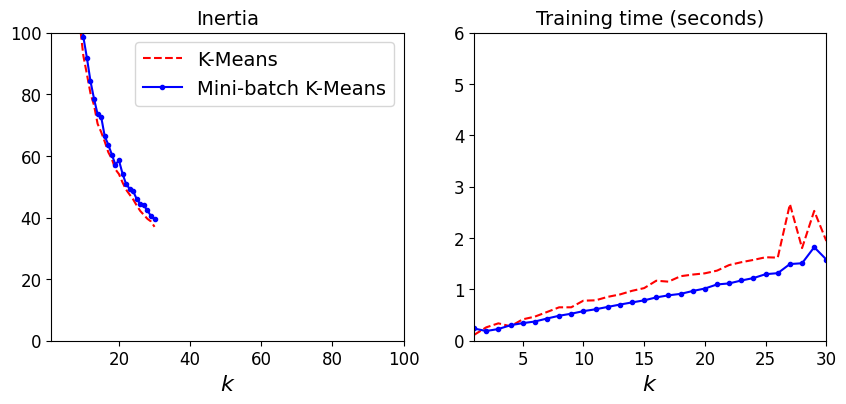

In [81]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 31), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 31), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 31), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 31), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 30, 0, 6])
plt.show()

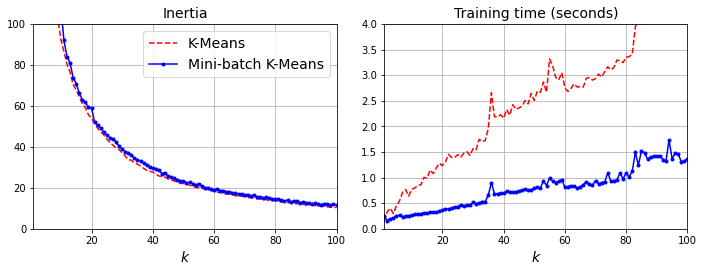

군집수가 많아질 수록 k-평균보다 시간은 3~4배 정도 빠르게 훈련되지만, 성능은 조금 낮다.

#### 최적의 클러스터 개수 찾기

k를 잘못 설정하면 군집화가 적절하게 진행되지 않는다.
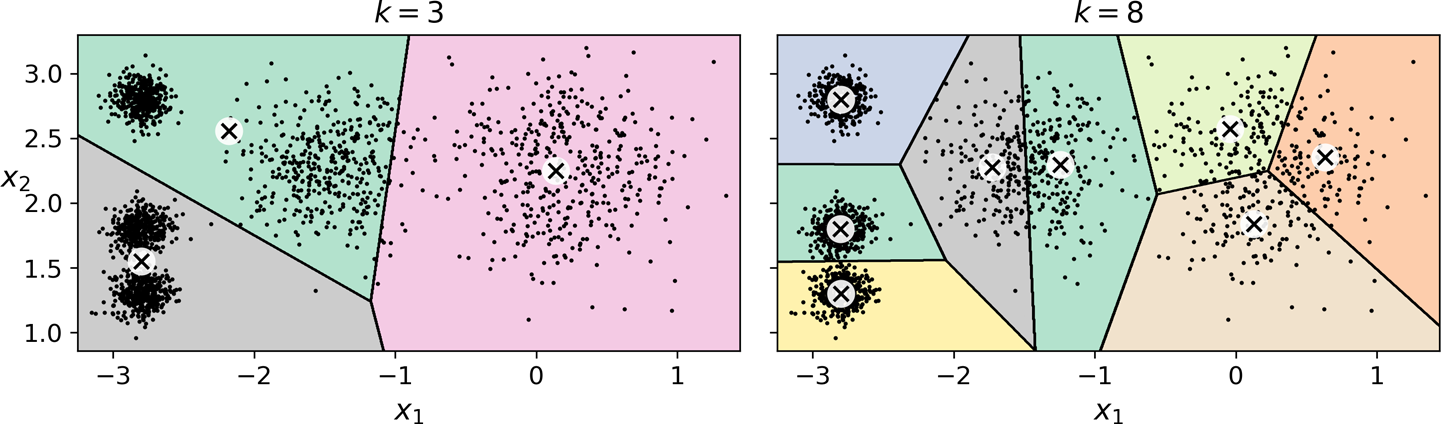

**방법 1: 관성과 군집수**

군집수 k가 증가할 수록 이너셔는 기본적으로 줄어들기에 이너셔만으로 모델을 평가하기엔 부족하다. 하지만 이너셔가 더 이상 획기적으로 줄어들지 않는 지점을 군집수 후보로 선정할 수는 있다.  
예를 들어 아래 그래프는 k가 1부터 9까지 변하는 동안 훈련된 모델의 이너셔를 측정하며, 이너셔가 현격하게 줄어드는 현상이 약화되기 시작하는 `k=4`가 군집수 후보로 괜찮아 보인다.

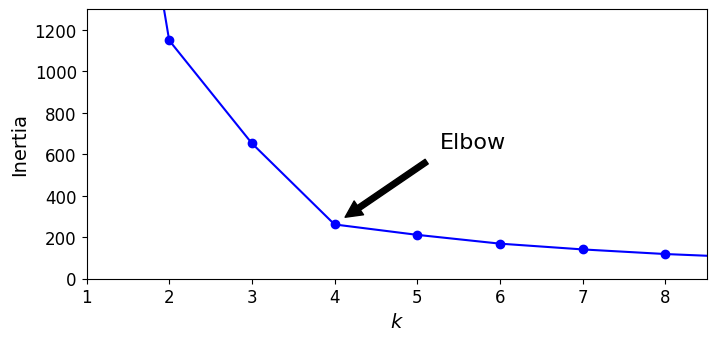

In [83]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

이유는 군집이 네 개보다 작으면 별로이고, 4개보다 많아도 훨씬 좋아진다고 보기 어렵기 때문이다. 하지만 4개의 군집으로 구성하려 하면 아래 그림과 같이 왼쪽 하단 두 개의 군집이 하나의 군집으로 처리될 수 있기에 가장 좋은 군집화라고 말하기 어렵다.
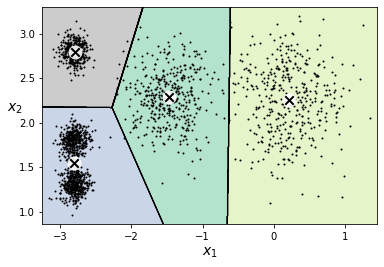

**방법 2: 실루엣 점수와 군집수**

`실루엣 점수(silhouette score)` : 모든 샘플에 대한 샘플 별 `실루엣 계수`의 평균값이다.  
샘플의 `실루엣 계수(silhouette coefficient)`는 다음 식으로 계산된다.

$$
\frac{b-a}{max(a,b)}
$$

$a$ : 동일 군집 내의 다른 샘플들과의 거리의 평균값  
$b$: 가장 가까운 타 군집에 속하는 샘플들과의 거리의 평균값

실루엣 계수는 -1과 1 사이의 값이며, 의미는 다음과 같다.
* 1에 가까울 때 : 해당 인스턴스가 속하는 군집의 한 센트로이드에 가깝게 위치함
* 0에 가까울 때 : 해당 인스턴스가 속하는 군집의 경계에 가깝게 위치함
* -1에 가까울 때 : 해당 인스턴스가 속하는 군집이 아닌 다른 군집의 센트로이드에 가깝게 위치함 (즉, 잘못된 군집에 속함)

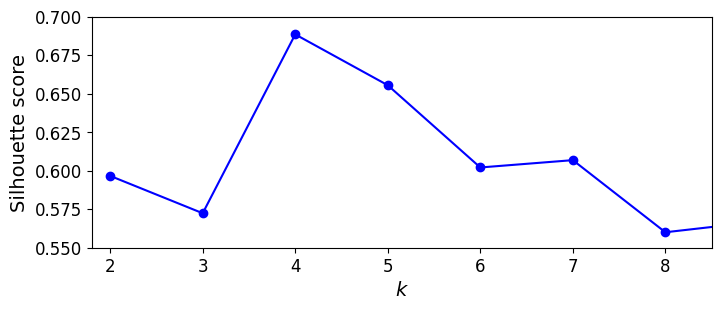

In [85]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

k=4가 여전히 매우 좋아 보인다. 하지만 관성의 경우와는 달리 k=5도 역시 꽤 좋다는 것을 알 수 있다.

**방법 3: 실루엣 다이어그램과 군집수**

`실루엣 다이어그램`은 군집별로 실루엣 계수들을 모아 놓은 그래프다.  
군집별로 실루엣 계수를 오름차순으로 정렬하면 아래 그림에서처럼 여러 개의 칼날 모양이 군집별로 형성된다.

- 칼날 두께: 군집에 포함된 샘플 수  
- 칼날 길이: 군집에 포함된 각 샘플의 실루엣 계수  
- 빨강 파선: 실루엣 점수, 즉 실루엣 계수의 평균값이다.

좋은 군집 모델은 대부분의 칼날이 빨간 파선보다 길어야 하며, 칼날의 두께가 서로 비슷해야 한다. (즉, 군집별 크기가 비슷해야 좋은 모델이다.)  
따라서 k=4일 때 전반적인 실루엣 점수가 높더라도 비슷한 크기의 `k=5`가 가장 좋은 모델이다.  

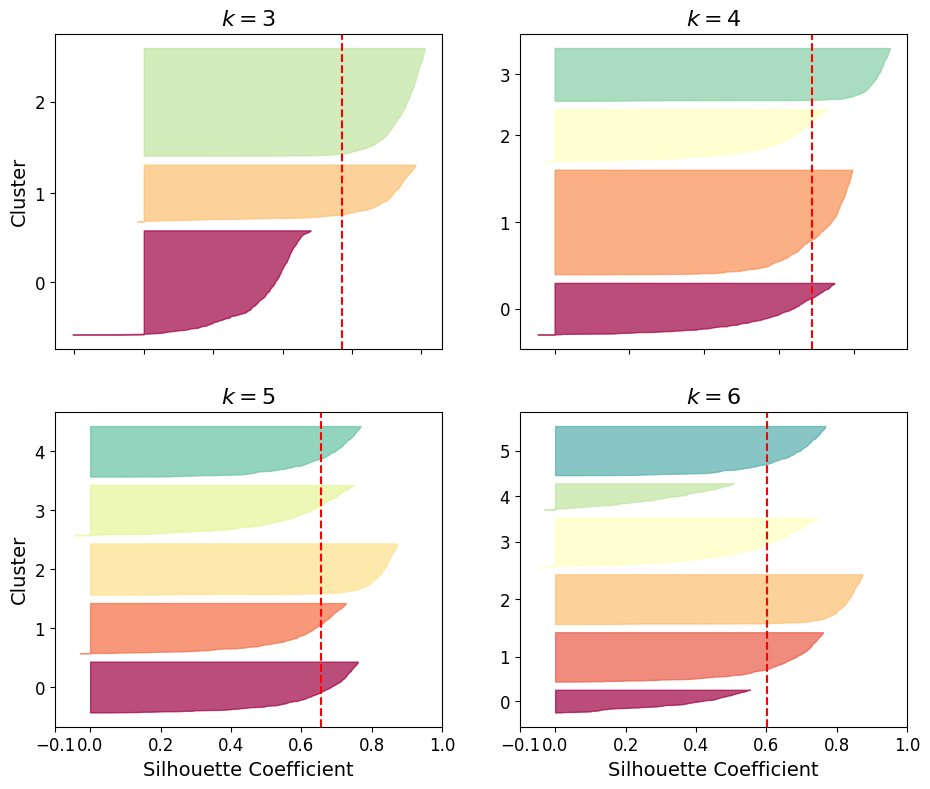

In [86]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### 9.1.2 k-means의 한계

- 최적의 모델을 구하기 위해 여러 번 학습해야 한다.

- 군집수를 미리 지정해야 한다.

- 군집의 크기나, 샘플의 밀도가 다르거나, 원형이 아닐 경우 잘 작동하지 않는다.  
    예를 들어, 아래 그림에 사용된 데이터 샘플들의 분포가 원형이 아니기에 양쪽 그림에서 보여지는 군집화 모두 적절하지 않다. 그리고 오른쪽 군집의 관성이 왼쪽 보다 작지만 군집화는 오히려 훨씬 나쁘다. 데이터 분포가 타원형인 경우 이어서 소개하는 가우스 혼합 모델(GMM)이 매우 잘 작동한다.  
    
세 개의 타원형 데이터 클러스터한 모습
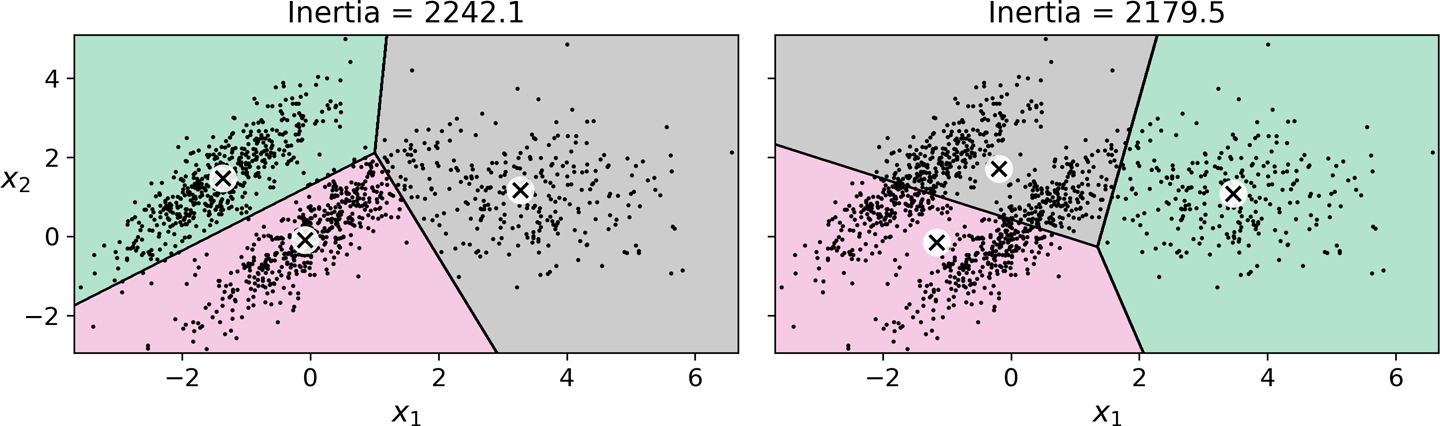

### 9.1.3 군집을 사용한 이미지 분할

`이미지 분할`은 이미지를 세그먼트 여러 개로 분할하는 작업이다.  
`시맨틱 분할(semantic segmentation)`에서는 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당된다.  
이보다 훨씬 간단한 작업인 `이미지 색상 분할`은 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당하는 것이다.

imread() 함수를 통해 무당벌레 이미지 가져오기

In [89]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
# 무당벌레 이미지 다운로드
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

filename = "ladybug.png"
print("Downloading", filename)

url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x18ab2354bb0>)

In [90]:
from matplotlib.image import imread
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))

image.shape

(533, 800, 3)

3차원 이미지 픽셀을 RGB 색상의 긴 리스트로 변환한 다음 k-means를 이용해 이 색상을 클러스터로 모은다.  

우선 이미지 픽셀을 일차원으로 변환한다.  
(533, 800, 3) $\rightarrow$ (426400, 3)

In [91]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

8개의 군집을 이용한 색상 분할

In [93]:
kmeans = KMeans(n_clusters=8, n_init = 10, random_state=42).fit(X)

In [94]:
kmeans.cluster_centers_

array([[0.9836374 , 0.9359338 , 0.02574807],
       [0.02289337, 0.11064845, 0.00578197],
       [0.21914783, 0.38675755, 0.05800817],
       [0.75775605, 0.21225454, 0.0445884 ],
       [0.09990625, 0.2542204 , 0.01693457],
       [0.61266166, 0.63010883, 0.38751987],
       [0.37212682, 0.5235918 , 0.15730345],
       [0.8845907 , 0.7256049 , 0.03442054]], dtype=float32)

각 훈련 샘플에 대한 레이블(kmeans.labels_)을 이용하여 군집별 센트로이드의 색상으로 통일시킨다

In [95]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

이미지를 원래의 크기로 다시 변환한다

In [96]:
segmented_img = segmented_img.reshape(image.shape)

5종류의 군집 수에 따른 이미지 색상 분할 결과

In [98]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)

for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init = 10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

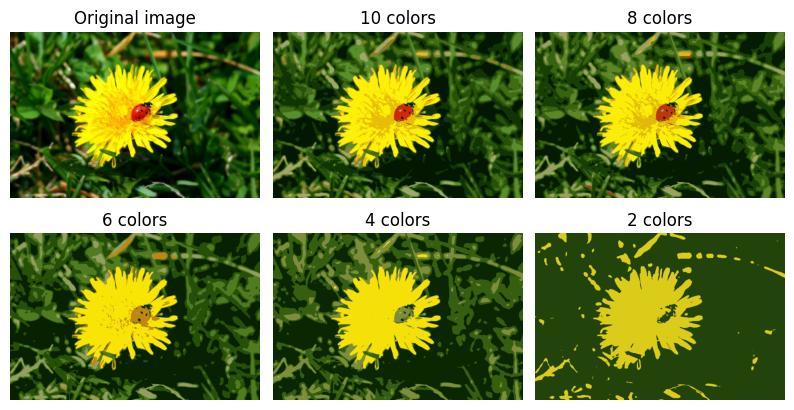

In [99]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

# 원본 이미지
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

# 색상 분할된 이미지 5개
for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

군집 수가 줄어들수록 이미지 색상을 다른 군집에 연결하기에 색상이 점차 사라진다

### 9.1.4 군집을 사용한 전처리

군집은 지도 학습 알고리즘을 적용하기 전에 전처리 단계로 사용할 수 있다  

훈련된 k-means 객체의 `transform()` 메서드는 주어진 데이터에 대해 각 센트로이드부터의 거리로 이루어진 어레이를 생성한다.  
즉, `n` 차원의 데이터셋을 `k` 차원의 데이터셋으로 변환한다.  
만약, `k < n` 이라면 이는 비선형 차원축소로 간주될 수 있으며 이어지는 지도학습에
유용하게 활용될 수 있다.

MNIST와 비슷한 데이터셋으로 1797개의 흑백 이미지 데이터

In [101]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

로지스틱 회귀 적용

In [104]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9688888888888889

군집화 전처리 이후 성능 비교  

50개의 군집으로 먼저 군집화를 한 다음에 로지스틱 회귀 모델 훈련

In [106]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, n_init=10, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, n_init=10, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [107]:
pipeline.score(X_test, y_test)

0.9777777777777777

파이프라인 모델의 성능이 더 좋다

#### 그리드 탐색 활용

그리드 탐색을 이용하여 최적의 군집수를 알아낼 수 있다.  
즉, 파이프라인의 성능이 최고가 되도록 하는 군집수는 다음과 같다.

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(10, 60))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ..............................kmeans__n_clusters=10; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=10; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=10; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=11; total time=   0.6s
[CV] END ..............................kmeans__n_clusters=11; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=11; total time=   0.6s
[CV] END ..............................kmeans__n_clusters=12; total time=   0.8s
[CV] END ..............................kmeans__n_clusters=12; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=12; total time=   0.9s
[CV] END ..............................kmeans__n_clusters=13; total time=   0.9s
[CV] END ..............................kmeans__n_clusters=13; total time=   0.9s
[CV] END ..............................kmeans__

[CV] END ..............................kmeans__n_clusters=43; total time=   2.7s
[CV] END ..............................kmeans__n_clusters=44; total time=   2.7s
[CV] END ..............................kmeans__n_clusters=44; total time=   2.6s
[CV] END ..............................kmeans__n_clusters=44; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=45; total time=   3.2s
[CV] END ..............................kmeans__n_clusters=45; total time=   2.6s
[CV] END ..............................kmeans__n_clusters=45; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=46; total time=   2.9s
[CV] END ..............................kmeans__n_clusters=46; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=46; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=47; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=47; total time=   2.9s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, n_init=10,
                                               random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(10, 60)}, verbose=2)

In [109]:
grid_clf.best_params_

{'kmeans__n_clusters': 33}

In [110]:
grid_clf.score(X_test, y_test)

0.9755555555555555

### 9.1.5 군집을 사용한 준지도 학습

**준지도학습**  

레이블이 없는 데이터가 많고 레이블이 있는 데이터가 적은 데이터셋에 대한 지도학습 기법이다.  

In [111]:
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test)

0.8333333333333334

먼저 무작위로 선정된 50개의 샘플만을 대상으로 로지스틱 회귀모델을 훈련하면
정확도 평균값이 83.33% 정도로 낮게 나온다.  
이유는 훈련 세트가 작아서 훈련이 제대로 되지 않기 때문이다.

**대표이미지 활용**

먼저 50개의 군집으로 군집화한 뒤에 각 군집의 센트로이드에 가장 가까운 이미지 50개를 대상으로 훈련한다.

In [113]:
k = 50

kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

변환된 훈련세트는 50개의 특성을 가지며, 샘플별로 50개 군집의 센트로이드 사이의 거리를 특성값으로 갖는다. 따라서 특성별로 최소값을 갖는 인덱스가 50개 군집의 센트로이드에 가장 가까운 샘플을 가리킨다. 이 성질을 이용하여 대표이미지를 아래와 같이 선정한다.

In [114]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)  # 50개의 대표이미지 인덱스 확인
X_representative_digits = X_train[representative_digit_idx]  # 50개의 대표이미지 지정

In [115]:
y_representative_digits = y_train[representative_digit_idx]

In [116]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

$\rightarrow$ 무작위로 선정된 레이블을 이용하는 것보다 대표 샘플을 군집화하여 이용하는 것이 훨씬 좋은 성능을 나타낸다.

#### 레이블 전파  

동일한 군집에 속하는 샘플의 레이블을 대표이미지의 레이블로 지정하는 방식

In [117]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [118]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

log_reg.score(X_test, y_test)

0.9333333333333333

군집 전체에 레이블을 전파하면 이상치 등에 대한 레이블 전파도 이루어지기에 모델의 성능을 약화시킬 수 있다.  
따라서 군집별로 센트로이드에 가까운 20%의 샘플에 대해서만 레이블을 전파하고, 나머지 샘플은 무시한다.

In [119]:
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

In [120]:
percentile_closest = 20

for i in range(k):
    in_cluster = (kmeans.labels_ == i)                 # 군집별 샘플 대상
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)   # 군집별 센트로이드 근접도 상위 20% 경곗값
    above_cutoff = (X_cluster_dist > cutoff_distance)  # 군집별 센트로이드 근접도 상위 20% 이내 샘플 대상
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [121]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [122]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

log_reg.score(X_test, y_test)

0.94

레이블된 샘플 50개만으로(평균적으로 클래스 당 5개 샘플) 94%의 정확도를 얻었다.  
이는 전체 데이터셋을 사용한 성능(96.9%)에 매우 가깝다.  
이렇게 좋은 이유는 전파된 레이블이 실제로 매우 좋기 때문이다.  

아래에서 볼 수 있듯이 실제 데이터와 99% 동일하다.

In [123]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846

### 9.1.6 DBSCAN

`DBSCAN(density-based spatial clustering of applications with noise`  
데이터셋의 `밀도`를 이용하여 군집을 구성하며,
하나의 군집은 연속된 `핵심 샘플(core samples)`들의 $\varepsilon$-이웃을 
모두 합친 결과이다.

- 알고리즘이 각 샘플에서 작은 거리인 $\varepsilon$(입실론) 내에 샘플이 몇 개 놓여 있는지 센다.  
이 지역을 샘플의 **$\varepsilon$-이웃** 이라고 부른다.

- (자기 자신을 포함해) **$\varepsilon$-이웃** 내에 적어도 `min_samples`개 샘플이 있다면 이를 **핵심 샘플**로 간주한다.  
즉, 핵심 샘플은 밀집된 지역에 있는 샘플이다.  

- 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속한다.  
이웃에는 다른 핵심 샘플이 포함될 수 있다. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성한다.  

- 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단한다.

DBSCAN 알고리즘은 모든 군집이 충분한 밀도의 샘플들로 구성되고 군집 사이는 저밀도 지역으로 구분될 수 있을 때 잘 작동한다.  

1000개의 샘플로 이루어진 `moons`데이터셋

In [129]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

DBSCAN 모델 훈련
- `eps=0.05`: 엡실론 반경
- `min_samples`: $\epsilon$ 반경 안에 있어야 하는 샘플 수. 

In [130]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

총 `7개`의 군집 생성  
일부 샘플의 군집 인덱스가 `-1`인 이유는 해당 샘플들이 `이상치`로 간주되었음을 의미한다

In [133]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

핵심 샘플은 총 `808개`로 지정되었다

In [134]:
len(dbscan.core_sample_indices_)

808

처음 10개의 핵심 샘플의 인덱스

In [135]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

핵심 샘플 자체는 `components_` 속성이 기억한다.   
처음 3개의 핵심 샘플

In [137]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

이웃의 반경을 기존의 0.05에서 0.2로 키우게 되면, 군집수가 2로 줄어들고 이상치도 사라진다

In [142]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

np.unique(dbscan2.labels_)

array([0, 1], dtype=int64)

`plot_dbscan()` 함수는 군집화된 샘플을 보여준다.
군집은 색으로 구분되며 각 샘플을 핵심 샘플, 이상치, 기타(non-core samples)로 구분한다.

- 핵심 샘플: 지정된 반경 안에 지정된 수의 샘플이 포함되는 샘플. 군집별 다른 색상 사용.
- 이상치: 어떤 핵심 샘플의 반경 안에도 포함되지 않는 샘플. 빨강 X로 표시.
- 기타: 다른 핵심 샘플의 반경 안에 있지만 자체는 핵심 샘플이 아닌 경우. 검은 점으로 표시.

In [143]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    
    # 코어 샘플 구분용 마스크 설정
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    
    # 이상치 구분용 마스크 설정
    anomalies_mask = dbscan.labels_ == -1
    
    # 기타 샘플용 마스크 설정
    non_core_mask = ~(core_mask | anomalies_mask)

    # 핵심 샘플
    cores = dbscan.components_
    # 이상치
    anomalies = X[anomalies_mask]
    # 기타
    non_cores = X[non_core_mask]
    
    # 핵심 샘플 산점도: 각 샘플과 함께 반경도 함께 표현
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    
    # 이상치 산점도: 빨강 X 표시
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    
    # 기타 샘플 산점도: 책과는 달리 명확한 구분을 위해 검은 점으로 표시
    #  plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c="k", marker=".")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

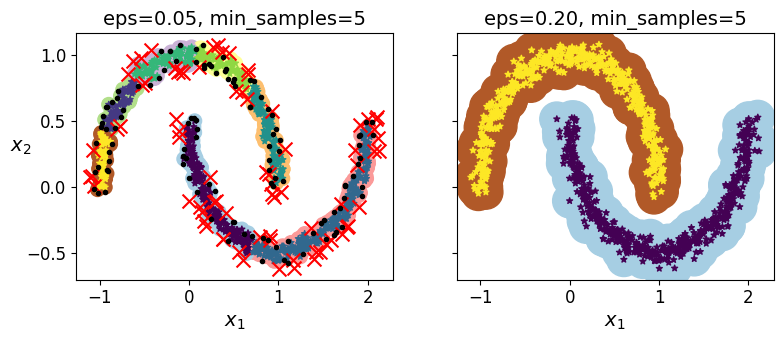

In [144]:
plt.figure(figsize=(9, 3.2))

# 왼편 그림: 반경 0.05
plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

# 오른편 그림: 반경 0.2
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [145]:
dbscan = dbscan2

`DBSCAN` 클래스는 `predict()` 메서드를 제공하지 않고, `fit_predict()`메서드를 제공한다.  
이 알고리즘은 새로운 샘플에 대해 클러스터를 예측할 수 없다는 뜻이다.  
이런 구현 결정은 다른 분류 알고리즘이 더 잘 수행할 수 있기 때문이다.  
따라서 사용자가 필요한 예측기를 선택해야 한다.

#### KNeighborsClassifier  

샘플 몇 개를 전달하여 어떤 클러스터에 속할 가능성이 높은지 예측하고 각 클러스터에 대한 확률 추정

In [147]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [148]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)